# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [9]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'StudentID' : range(1, 11), 
                            'Age' : [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                            'Tardies' : [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

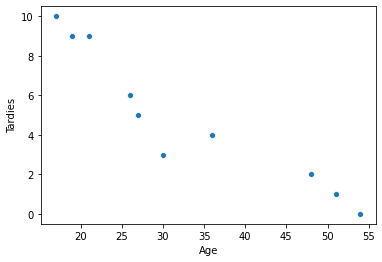

In [16]:
# Your code here.
import seaborn as sns
x = student_data['Age']
y = student_data['Tardies']
sns.scatterplot(x, y);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

'''
There seems to be a negative correlation between 
the variables 'Age' and 'Tardies' as age movos up, 
the amount of tardies goes down.

'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

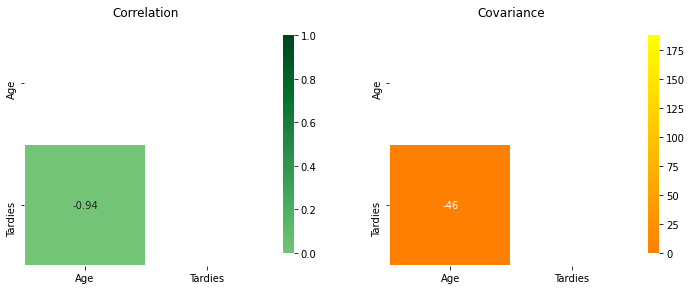

In [54]:
# Your response here.
fig = plt.figure(figsize=(12,8))

corr = student_data[['Age', 'Tardies']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig.add_subplot(1,2, 1)
sns.heatmap(corr, mask=mask, cmap='Greens', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.title('Correlation')

covMatrix = student_data[['Age', 'Tardies']].cov()
mask = np.zeros_like(covMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig.add_subplot(1,2, 2)
sns.heatmap(covMatrix, mask=mask, cmap='autumn', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.title('Covariance')
plt.show()

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [56]:
# Your response here.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = student_data[['Age']]
y = student_data['Tardies']
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
model.coef_

array([-0.24282077])

In [66]:
model.score(X, y)

0.8820265558250109

Plot your regression model on your scatter plot.

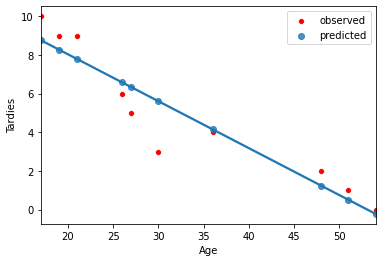

In [60]:
# Your code here.
y_pred = model.predict(X)
sns.scatterplot(x, y, color='red', label='observed')
sns.regplot(x, y_pred, label='predicted')
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
'''
Approximately 88% of the variance present in Tardies
can be explained by the Age variable. For every year in life, 
it is predicted to have -.24 units in Tardies.
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [72]:
# Import any libraries you may need & the data
vehicles_original = pd.read_csv('/Users/joaootaviomeirellesratton/Desktop/Ironhack/Labs/Week 6/Linear Regression/Data/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

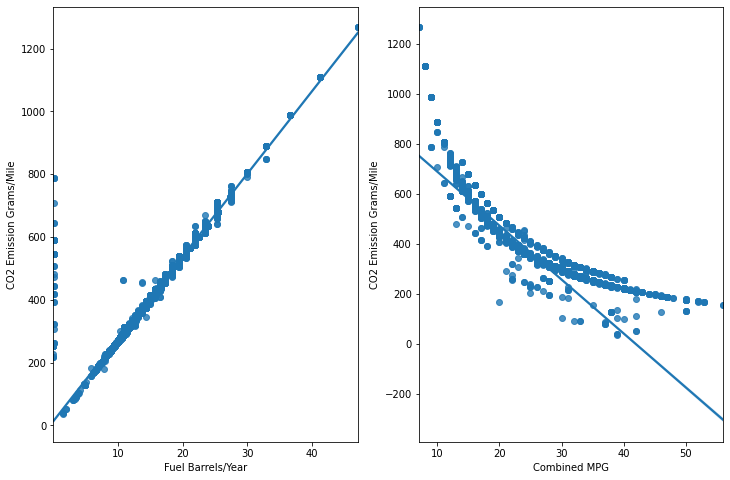

In [101]:
fig = plt.figure(figsize=(12,8))

fig.add_subplot(1,2, 1)
sns.regplot(vehicles['Fuel Barrels/Year'], vehicles['CO2 Emission Grams/Mile'])
fig.add_subplot(1,2, 2)
sns.regplot(vehicles['Combined MPG'], vehicles['CO2 Emission Grams/Mile'])

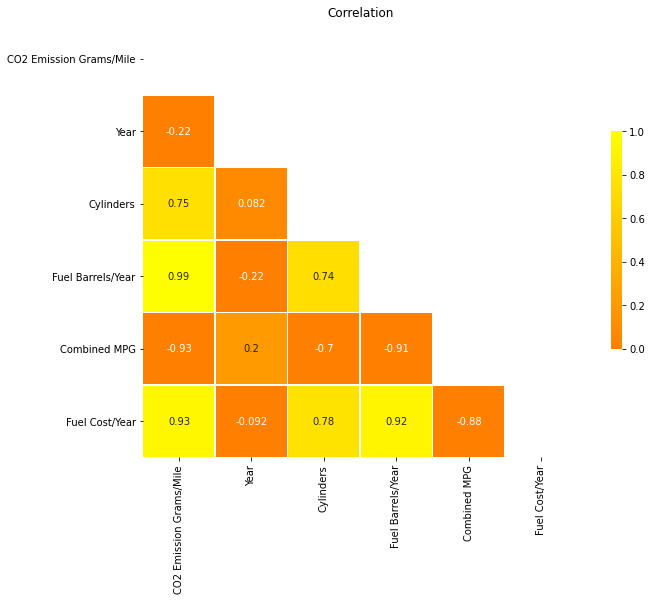

In [82]:
# Your response here.
vehicles = vehicles_original[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year',
                            'Combined MPG', 'Fuel Cost/Year']]

fig = plt.figure(figsize=(12,8))

corr = vehicles.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='autumn', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.yticks(rotation=360)
plt.title('Correlation');

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [106]:
# Your response here. 

from sklearn.preprocessing import StandardScaler
X = vehicles[['Fuel Barrels/Year', 'Combined MPG']]
y = vehicles['CO2 Emission Grams/Mile']
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

model = LinearRegression()
model.fit(X, y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [118]:
# Your response here.
model_results = {'Variables' : ['Fuel Barrels/Year', 'Combined MPG'], 'Coefficients' : model.coef_}
results = pd.DataFrame(model_results)
results

,Variables,Coefficients
0,Fuel Barrels/Year,22.197145
1,Combined MPG,-3.925082


In [123]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [125]:
y_pred = model.predict(X)
regression_results(y, y_pred)

explained_variance:  0.9775
mean_squared_log_error:  0.0048
r2:  0.9775
MAE:  6.3293
MSE:  319.444
RMSE:  17.873


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [129]:
# Your code here.
party = pd.DataFrame({'invitees' : [1,3,4,6,8,9,11,14],
                     'atendees' : [1,2,4,4,5,7,8,13]})
party

,invitees,atendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

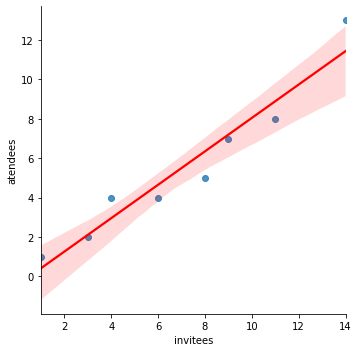

In [141]:
# Your code here.
plots = sns.lmplot('invitees', 'atendees', data=party, fit_reg=False)
sns.regplot('invitees', 'atendees', data=party, scatter=False, color='red')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
'''
The more people are invited, the more people show up.
But it doesn't answer the suspicion, which is the if the number
of people who can't attend the party increases and the number of
invitees goes up.
'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

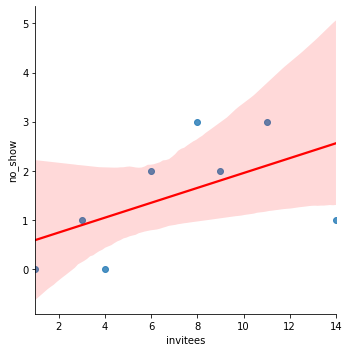

In [145]:
# Your response here. 
party['no_show'] = party['invitees'] - party['atendees']
plots = sns.lmplot('invitees', 'no_show', data=party, fit_reg=False)
sns.regplot('invitees', 'no_show', data=party, scatter=False, color='red')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 